# Causal Inference 

Causal inference is about testing the significance of 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Causal Effect 

Causal effect is the slope of effect vs treatment.

''

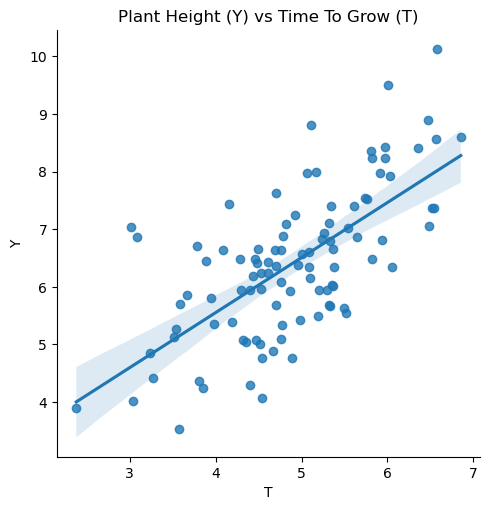

In [3]:
np.random.seed(42)
df = pd.DataFrame()
df["T"] = np.random.normal(loc = 5, scale =1, size =100)
df["Y"] = np.random.normal(loc = 1.1  * df["T"] +  1, scale  =1)
sns.lmplot(data = df , x="T", y="Y")#,ci=True)
plt.title("Plant Height (Y) vs Time To Grow (T)")
;

In [4]:
import statsmodels.formula.api as sms
sms.ols(formula='Y~T',data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.7237,0.523,3.295,0.001,0.685,2.762
T,0.9567,0.105,9.105,0.000,0.748,1.165


## Assesing causal Claims

Null Hypothesis; the average causal effect of a treatment


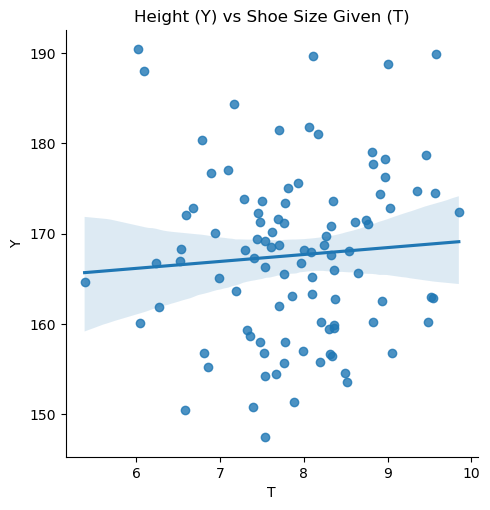

In [5]:
np.random.seed(42)
df = pd.DataFrame()
df["T"] = np.random.normal(loc = 8, scale =1, size =100)
df["Y"] = np.random.normal(loc = 2.2  * df["T"] +  150, scale  =10)

sns.lmplot(data = df , x="T", y="Y",legend=True)
plt.title("Height (Y) vs Shoe Size Given (T)");

\in 

In [6]:
import statsmodels.formula.api as sms
sms.ols(formula='Y ~ T',data = df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,161.5349,8.352,19.341,0.000,144.961,178.109
T,0.7674,1.051,0.730,0.467,-1.318,2.853


## A/B Testing

Binary treatment, random assignment. 

In [7]:
np.random.seed(42)
df = pd.DataFrame()

In [8]:
df["T"] = np.random.choice(
    a=[0,1], p=[.9,.1], size =100
)
df["Y"] = np.random.normal(
    loc = 1.1*df["T"]+10 , 
    scale  = 1.0
)

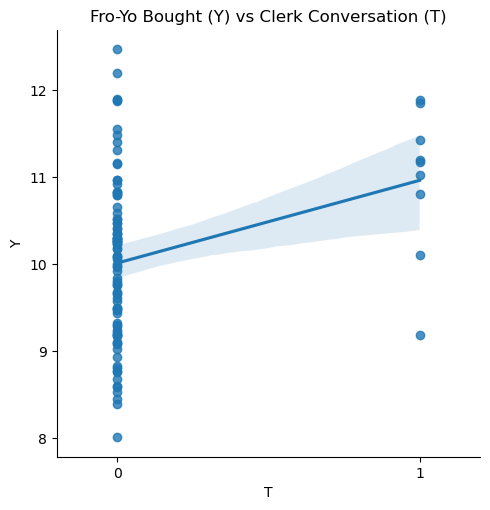

In [9]:
sns.lmplot(data = df , x="T", y="Y",legend=True)#, hue='T')
plt.xlim(left = -0.2, right =1.2)
plt.xticks(ticks = [0.0,1.0], labels =[0,1])
plt.title("Fro-Yo Bought (Y) vs Clerk Conversation (T)");

## Conditionally Random Experiments



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
def random_treatment_by_risk(risk):
    if risk == 'high':
        return np.random.choice(a=[0,1], p=[.99,.01]) 
    else: 
        return np.random.choice(a=[0,1], p=[.9,.1]) 

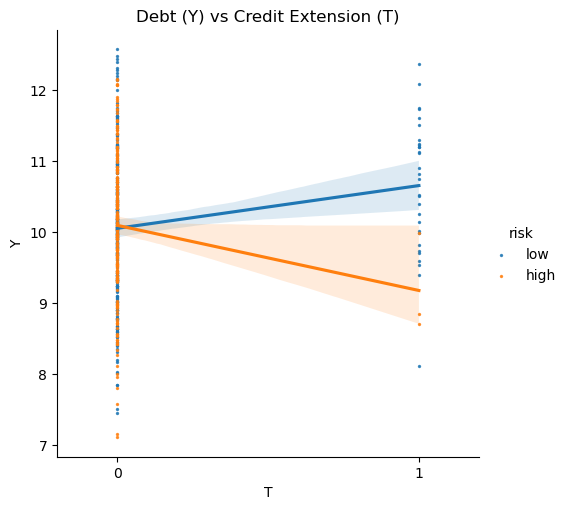

In [14]:
np.random.seed(42)
df = pd.DataFrame()
df['credit_score'] = np.random.normal(loc =460, scale =60, size = 500)
df['risk'] = df['credit_score'].apply(lambda x: "high" if x<450 else "low")
df["T"] = df['risk'].apply(random_treatment_by_risk)
risk_filter = (df['risk'] == "high")
df.loc[risk_filter,"Y"] = np.random.normal(-.8* df.loc[risk_filter,"T"] +10) 
df.loc[~risk_filter,"Y"] = np.random.normal(0.7* df.loc[~risk_filter,"T"] +10 ) 

sns.lmplot(data = df , x="T", y="Y",legend=True, hue = "risk",scatter_kws={"s": 2})
plt.xlim(left = -0.2, right =1.2)
plt.xticks(ticks = [0.0,1.0], labels =[0,1])
plt.title("Debt (Y) vs Credit Extension (T)");

## Confounding

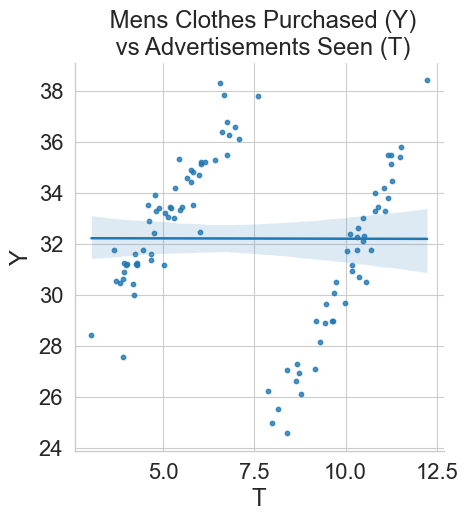

<Figure size 500x300 with 0 Axes>

In [31]:
n = 10
np.random.seed(123)
noise = np.random.normal

df = pd.DataFrame()
# df['X'] = np.random.choice(a = ["Men","Women"], size =100) 
df['X'] = np.random.choice(a = [0,1], size =100) 
n_men = df[df['X'] == 0]
n_women = df[df['X'] == 1]

# generate treatment values for men
def generate_t(x):
    if x == 0:
        return noise(loc = 5, scale = 1)
    elif x == 1:
        return noise(loc = 10, scale = 1)
    
df['T'] = df["X"].apply(generate_t)
men_filter = df["X"] == 0
df.loc[men_filter,"Y"] =  noise(loc = 2*df.loc[men_filter,"T"] + 23, scale = 1)
df.loc[~men_filter,"Y"] = noise(loc = 3*df.loc[~men_filter,"T"] +1 , scale = 1)

#set plotting style
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.8)

# plt.figure(figsize=(12, 6))  # Specify the width and height in inches
sns.lmplot(data = df, x="T", y="Y", scatter_kws={"s": 10},)# hue = "X")
# labels = [int(tick) for tick in ticks]
# plt.yticks(ticks=ticks, labels=labels)
plt.title(" Mens Clothes Purchased (Y)\n vs Advertisements Seen (T)")
plt.figure(figsize=(5, 3))
plt.tight_layout();

In [32]:
sms.ols(formula='Y~ T',data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.2318,0.911,35.392,0.000,30.425,34.039
T,-0.0027,0.116,-0.023,0.982,-0.234,0.228


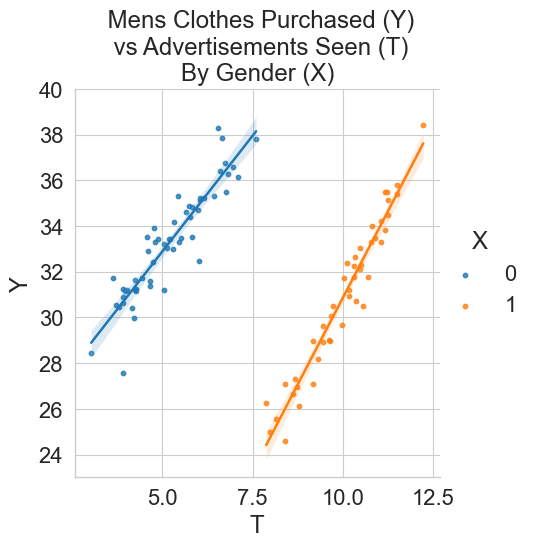

<Figure size 700x300 with 0 Axes>

In [33]:
# Create a custom legend with the slopes
sns.lmplot(data = df, x="T", y="Y", 
           hue = "X"
          ,scatter_kws={"s": 10})
ticks = np.linspace(24,40,9)
labels = [int(tick) for tick in ticks]
plt.yticks(ticks=ticks, labels=labels)
plt.title(" Mens Clothes Purchased (Y)\n vs Advertisements Seen (T)\nBy Gender (X)")
plt.figure(figsize=(7, 3))
plt.tight_layout();

In [34]:
sms.ols(formula='Y~ T + X',data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.4528,0.526,38.895,0.000,19.409,21.496
T,2.4717,0.098,25.259,0.000,2.277,2.666
X,-14.3113,0.518,-27.614,0.000,-15.340,-13.283


## Binary Outcome


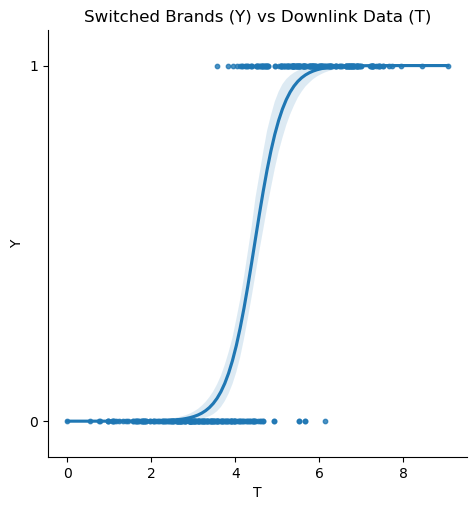

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n=200
def generate_T_Y_df(a,b,v):
    df0 = pd.DataFrame() 
    df1 = pd.DataFrame()
    df0["T"] = np.random.normal(loc = a, scale = v, size =n) 
    df0["Y"] = 0 
    df1["T"] = np.random.normal(loc = b, scale = v, size =n)
    df1["Y"] = 1 
    df = pd.concat([df0,df1])
    # Clip: force T to be non-negative. 
    df["T"] = df["T"].apply(lambda x: 0 if x<0 else x)
    return df

df = generate_T_Y_df(3,6,1)

sns.lmplot(data = df, x="T", y="Y",logistic=True, scatter_kws={"s": 10})
plt.ylim(-.1,1.1)
plt.yticks(ticks=[0,1], labels=[0,1])
plt.title("Switched Brands (Y) vs Downlink Data (T)");

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257:

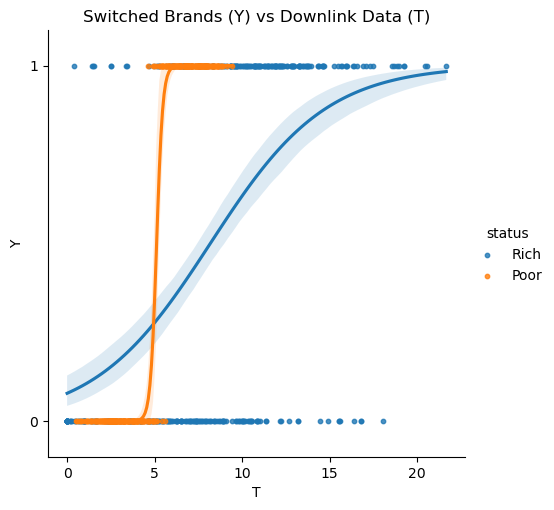

In [81]:
rich_df = generate_T_Y_df(6,10,4)
rich_df["status"] = "Rich"
poor_df = generate_T_Y_df(3,7,1)
poor_df["status"] = "Poor"

df = pd.concat([rich_df,poor_df])
sns.lmplot(data = df, x="T", y="Y", 
           hue = "status",
           logistic=True, scatter_kws={"s": 10})
plt.ylim(-.1,1.1)
plt.yticks(ticks=[0,1], labels=[0,1])
plt.title("Switched Brands (Y) vs Downlink Data (T)");

It should also be possible to model with sigmoidal bernoulli probability of success.

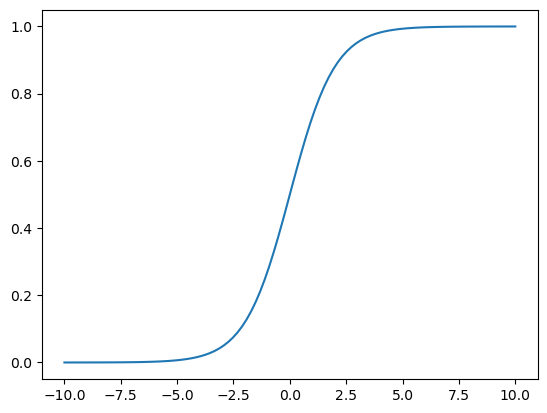

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xs = np.linspace(-10,10,100)
ys = sigmoid(xs)
plt.plot(xs, ys)

In [13]:
def ber_sig(x):
    y = np.random.choice( a=[0,1], p=[1-sigmoid(x),sigmoid(x)], size =1)
    return y
ber_sig = np.vectorize(ber_sig)
ber_sig(xs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257:

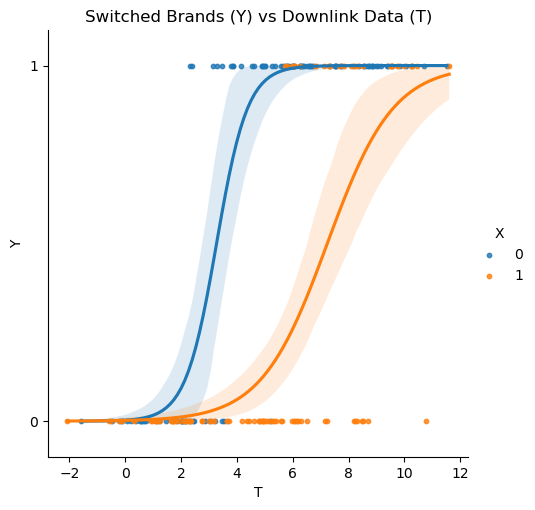

In [18]:
df0 = pd.DataFrame() 
df1 = pd.DataFrame()
xs = np.linspace(0,10,100)
df0["T"] = np.random.normal(loc=xs)
df0["Y"] = ber_sig(2*(df0["T"] -3))
df0["X"] = 0
df1["T"] = np.random.normal(loc=xs)
df1["Y"] = ber_sig(2*(df0["T"] - 7))
df1["X"] = 1
df = pd.concat([df0,df1])
sns.lmplot(data = df, x="T", y="Y",
           hue= "X", logistic=True, scatter_kws={"s": 10})
plt.ylim(-.1,1.1)
plt.yticks(ticks=[0,1], labels=[0,1])
plt.title("Switched Brands (Y) vs Downlink Data (T)");

## Treatement Hererogeneity

$$ 
Y = \beta_1 \color{purple}{X T} + \beta_0 T + \delta_1 X + \delta_0\\
\implies 
\text{ATE}(X) = \frac{\partial Y}{\partial T}(X) = \beta_1 X + \beta_0
$$

Text(0.5, 1.0, 'Yearly Grocery Trips (Y) vs Ads Seen\nby N Cars (X)')

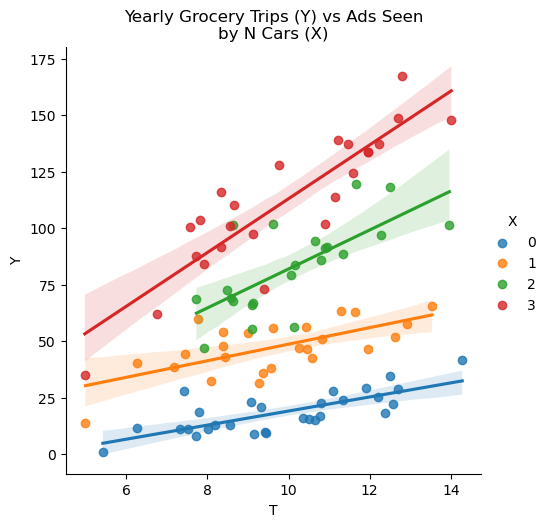

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n = 100
df = pd.DataFrame()
# Generate a variety of people specified by their x value
df["X"] = np.random.choice(a=[0,1,2,3],size = n)
# randomly assign treatment
df["T"] = np.random.normal(10, 2, 100)
# Artificially create an X and T dependent outcome
df["Y"] = np.random.normal(  loc=3.0* df["X"]*df["T"] + 2.0*df["T"], scale = 2*df["X"]+8)

sns.lmplot(data = df, x="T", y="Y",
          hue = "X")
plt.title("Yearly Grocery Trips (Y) vs Ads Seen\nby N Cars (X)")

Text(0.5, 1.0, 'Yearly Grocery Trips (Y) vs Ads Seen')

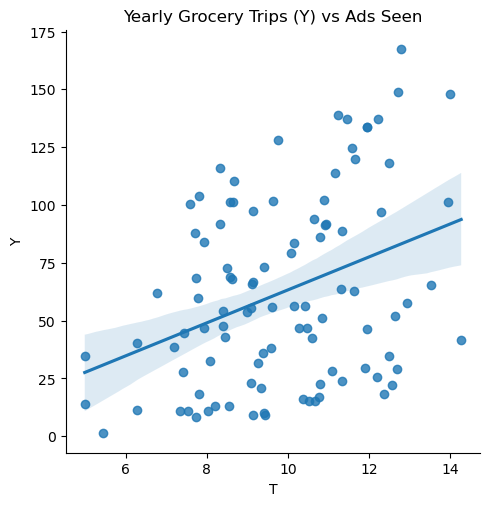

In [103]:
sns.lmplot(data = df, x="T", y="Y",
          # hue = "X"
          )
plt.title("Yearly Grocery Trips (Y) vs Ads Seen")

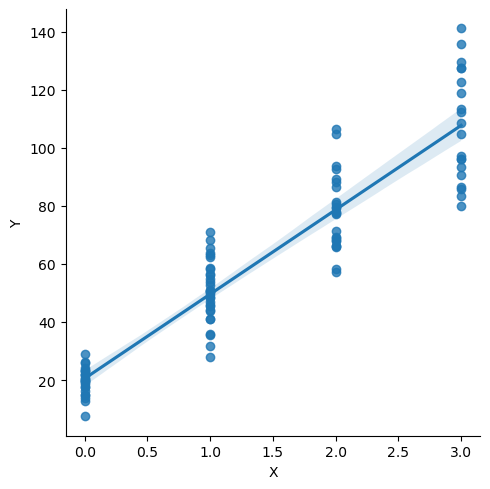

In [88]:
sns.lmplot(data = df, x="X", y="Y")

## Bias Veriance Tradeoff



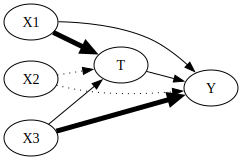

In [1]:
import graphviz as gr
# Order here seems to determine vertical order in the visualization.
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("X1", "T", penwidth="5"),
g.edge("X2", "T", #penwidth="3", 
       style="dotted"),
g.edge("X3", "T", penwidth="1"),
g.edge("X1", "Y", penwidth="1"),
g.edge("X2", "Y", #penwidth="3", 
       style = "dotted"),
g.edge("X3", "Y", penwidth="5"),

g.edge("T", "Y"),

g

$X_1$ explains away variance in $T$ (and thus increases variance in $\hat{\tau}$) more than it removes bias. 

$X_3$ reduces confounder bias more than explaining variance in $T$. 

Seems to me like $X_1$ is a bad choice for variable to control for, $X_2$ is good. 

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

np.random.seed(123)
n = 100
(x1, x2, x3) = (np.random.normal(0, 1, n) for _ in range(3)) 
t = np.random.normal(10*x1 + 5*x2 + x3)
# ate = 0.05
y = np.random.normal(0.05*t + x1 + 5*x2 + 10*x3, 5)
df = pd.DataFrame(dict(y=y, t=t, x1=x1, x2=x2, x3=x3))
smf.ols("y~t+x1+x2+x3", data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2707,0.527,0.514,0.608,-0.775,1.316
t,0.8664,0.607,1.427,0.157,-0.339,2.072
x1,-7.0628,6.038,-1.170,0.245,-19.049,4.923
x2,0.0143,3.128,0.005,0.996,-6.195,6.224
x3,9.6292,0.887,10.861,0.000,7.869,11.389


The 95% CI contains 0 so we can not reject $H_0: \tau =0$. This is because the variance in $T$ is too big because $X_1$ is explaining away variance in $T$ and thus increasing variance in $\hat{\tau}$.

Removing $X_1$ from the fit, the 95% CI fot $\hat{\tau}$ no longer contains 0 and thus the null hypothesis can be rejected.  



In [9]:
smf.ols("y~t+x2+x3", data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1889,0.523,0.361,0.719,-0.849,1.227
t,0.1585,0.046,3.410,0.001,0.066,0.251
x2,3.6095,0.582,6.197,0.000,2.453,4.766
x3,10.4549,0.537,19.453,0.000,9.388,11.522


## Overlap


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

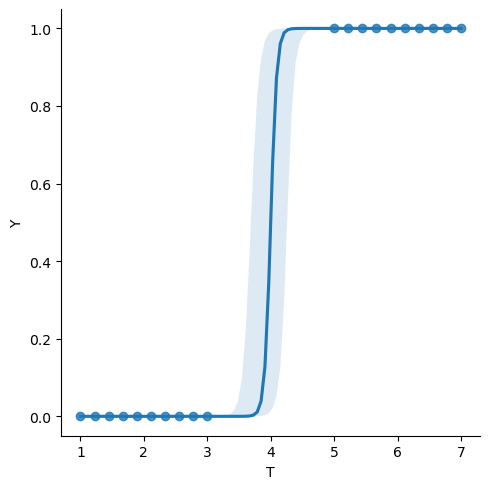

In [10]:
import warnings
warnings.filterwarnings("ignore")

df0 = pd.DataFrame()
df0["T"] = np.linspace(1,3,10)
df0["Y"] = 0
df1 = pd.DataFrame()
df1["T"] = np.linspace(5,7,10)
df1["Y"] = 1
df = pd.concat([df0,df1])

sns.lmplot(data =df, x="T", y="Y",logistic = True )


# Fiddling here... 

**Question:** Does sampling by account instead of sampling by subscriber introduce bias? 

More mathematically, consider the ratio $R$ of subscribers that are from accounts with multiple subscribers. We wish to compare the expected value of that ratio under two methods of sampling
1. Sampling by account number
2. sampling by subscriber.



In [75]:
import pandas as pd 
import numpy as np
from itertools import combinations 

def make_data():
    N = 10
    df = pd.DataFrame()
    df["account"] = list(range(N))
    df['n_subs'] = np.random.choice(a=[1,2], p=[.7,.3], size=N)
    return df

df = make_data()

def zero_if_one(x):
    if x==1:
        return 0
    else:
        return x

def make_samples(df):
    sample_size = 7
    samples = list(combinations(df["account"].values , r = sample_size))
    # Change samples from tuples to lists
    samples = [list(sample) for sample in samples]
    return samples

In [78]:
make_samples(make_data())

[[0, 1, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 4, 5, 7],
 [0, 1, 2, 3, 4, 5, 8],
 [0, 1, 2, 3, 4, 5, 9],
 [0, 1, 2, 3, 4, 6, 7],
 [0, 1, 2, 3, 4, 6, 8],
 [0, 1, 2, 3, 4, 6, 9],
 [0, 1, 2, 3, 4, 7, 8],
 [0, 1, 2, 3, 4, 7, 9],
 [0, 1, 2, 3, 4, 8, 9],
 [0, 1, 2, 3, 5, 6, 7],
 [0, 1, 2, 3, 5, 6, 8],
 [0, 1, 2, 3, 5, 6, 9],
 [0, 1, 2, 3, 5, 7, 8],
 [0, 1, 2, 3, 5, 7, 9],
 [0, 1, 2, 3, 5, 8, 9],
 [0, 1, 2, 3, 6, 7, 8],
 [0, 1, 2, 3, 6, 7, 9],
 [0, 1, 2, 3, 6, 8, 9],
 [0, 1, 2, 3, 7, 8, 9],
 [0, 1, 2, 4, 5, 6, 7],
 [0, 1, 2, 4, 5, 6, 8],
 [0, 1, 2, 4, 5, 6, 9],
 [0, 1, 2, 4, 5, 7, 8],
 [0, 1, 2, 4, 5, 7, 9],
 [0, 1, 2, 4, 5, 8, 9],
 [0, 1, 2, 4, 6, 7, 8],
 [0, 1, 2, 4, 6, 7, 9],
 [0, 1, 2, 4, 6, 8, 9],
 [0, 1, 2, 4, 7, 8, 9],
 [0, 1, 2, 5, 6, 7, 8],
 [0, 1, 2, 5, 6, 7, 9],
 [0, 1, 2, 5, 6, 8, 9],
 [0, 1, 2, 5, 7, 8, 9],
 [0, 1, 2, 6, 7, 8, 9],
 [0, 1, 3, 4, 5, 6, 7],
 [0, 1, 3, 4, 5, 6, 8],
 [0, 1, 3, 4, 5, 6, 9],
 [0, 1, 3, 4, 5, 7, 8],
 [0, 1, 3, 4, 5, 7, 9],
 [0, 1, 3, 4, 5, 8, 9],
 [0, 1, 3, 4, 6,

In [76]:
def ms_fraction_by_account(df, samples):
    sum_nmsa = [df.loc[sample]['n_subs'].map(zero_if_one).sum() for sample in samples]
    num = sum(sum_nmsa)
    sum_n_subs_in_acct = [df.loc[sample]['n_subs'].sum() for sample in samples]
    denom = sum(sum_n_subs_in_acct)
    return num/denom

ms_fraction_by_account(df,samples)

0.6666666666666666

In [77]:
def ms_frac_by_subs(df):
    n_subscribers = df["n_subs"].sum()
    n_multi_subscriber_account_subscribers = df["n_subs"].apply(zero_if_one).sum()
    return n_multi_subscriber_account_subscribers/n_subscribers
ms_frac_by_subs(df)


0.6666666666666666

In [74]:
2237.30/60


37.288333333333334

# Pre-treatment heterogeneity bias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pretreatment_het_bias = 2
ATE = 2
df0 = pd.DataFrame()
df0["T"] = np.linspace(0,10,100)
df0["Y"] = df["T"]
df0["p"] = "Potential"

df0["T"] = np.linspace(0,10,100)
df0["Y"] = df["T"]
df0["p"] = "Actual"

df["Y"]  = ATE*df["T"]
df

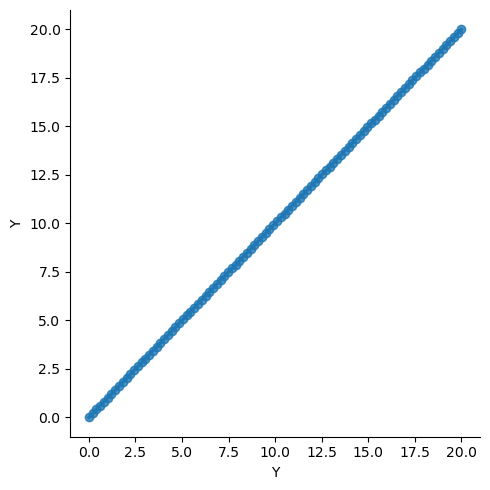

In [4]:
sns.lmplot(data = df , x= "Y", y="Y")